In [1]:
# 安装分词必要的包
# pip install jieba
# pip install worldcloud
# have packages installed
#调用必要的包
import jieba as jb 
import wordcloud as wc 
import pandas as pd 
import os 
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# read the file and complaint of daoliu was from last 90 days
# 用Pandas读取分词数据
complaint = pd.read_table("Desktop/daoliu_order_comment.csv", sep='\t')
complaint.shape

(52311, 6)

In [3]:
# have a glimpse of data
complaint.head()

,tdate,cmp_type_txt,content,area,comment_type,guide_scene
0,2018-03-15,优享车里有烟味!,车辆信息不符（车辆、车型等）,1,3,8
1,2018-03-14,NaN,联系不上司机,5,3,2
2,2018-03-14,不接就不接，，干嘛取消,司机以各种理由不来接我,5,3,8
3,2018-03-15,怎么开的给我开到36元去了，我平时做到那边就18元，你们这是黑车嘛，我靠,绕路多产生费用,35,3,2
4,2018-03-14,第一次联系说是走错，要我等。第二次不接电话，直接取消了订单,联系不上司机,34,3,2


In [4]:
# change the data formatting
complaint['cmp_type_txt'] = complaint['cmp_type_txt'].astype('str') #这里尤其要注意，必须将需要分词的列转换成string形式，object形式是不能直接被jieba分词的

In [5]:
# check comment type and extract key words
# complaint[complaint['guide_scene']==2].groupby('content').agg({'comment_type': 'count'}).sort_values(by='comment_type',ascending=False)
# complaint[complaint['guide_scene']==8].groupby('content').agg({'comment_type': 'count'}).sort_values(by='comment_type',ascending=False) 
# 按类查看抱怨次数
complaint.groupby('content').agg({'comment_type': 'count'}).sort_values(by='comment_type',ascending=False) 

,comment_type
content,
绕路多产生费用,12899
未及时结束计费,9095
提前计费,4999
未坐车产生费用,3863
联系不上司机,3496
司机以各种理由不来接我,2801
不认可取消费,2415
司机服务态度恶劣,2223
多收了高速/路桥/停车等附加费,1981


In [6]:
# generate high-frequent words to add 
# 为jieba添加预先设置的业务词组：
add_words = ['费用','提前计费','态度恶劣','不来接我','附加费','取消订单','多收费','高速费','过路费','联系不上','要求加价','不结束','提前开始','多收','直接开始行程','不给我打电话','打电话']

In [45]:
# add words to jb
for word in add_words:
    jb.add_word(word)

In [8]:
# create a function to count the frequency of the words
# 做一个分词并生成词频的函数fenci
def fenci(x):  #x是一个seires对象，即待进行分词的数据列
    fenci_list = [] #创建一个空的列表，用于储存分词得到的list
    
    for i in range(x.shape[0]):
        results=[] #创建一个空的集合result，用于储存x对象每一行的分词结果
        words_split = jb.cut(x[i]) #用jb.cut函数实现文本段的分词
        for w in words_split:
            results.append(w #把分词结果words_spilt的每一个词语整合起来，加入results列表中。
        fenci_list.extend(results) #把每一行分词结果整合成一个较大的list
        #到这一步为止，通过循环的方式对原始数据列的每一行进行了分词，并把分词结果整合成了一个词语列表fenci_list
    fenci_table = pd.DataFrame(fenci_list, columns=['word'])
    fenci_table = pd.DataFrame(fenci_table['word'].value_counts()) #计算每个词出现的频率，整合成一个词频表
    fenci_table.reset_index(inplace=True)
    fenci_table.columns = ['word', 'freq']
    return(fenci_table)

In [44]:
#应用刚建立好的分词函数对需要分词的数据列进行分词，得到词频表
word_freq = fenci(complaint['cmp_type_txt'])
word_freq.head(20)

,word,freq
0,，,31008
1,nan,21340
2,我,15029
3,了,14236
4,的,11778
5,,8874
6,司机,8754
7,。,5977
8,多,5646
9,不,5336


In [47]:
# clean the words by deleting the useless words
# 利用pandas清洗掉无效的词
#x[(True^x['a'].isin(...))]可用于实现Pandas Dataframe对象X的a列不包含某些词的切片筛选，类似SQL的not in (...)
word_freq = word_freq[(True^word_freq['word'].isin(['，','。','nan','滴滴','司机','的','了','！','？','我','不','他','没有','就',
'走','怎么','我们','已经','这个','订单','了','是','元','在','到','要求','不是','什么','上车','下车','产生','为什么','显示','接单','结束','然后','而且','但是','行程','坐车',' ','说','还','让',
'接','没','也','有','都','又','打','去','车','20','10','叫','有','自己','要','后','也','给','多','等','自己',
'车','叫']))]
word_freq.head()

,word,freq
10,费用,5148
26,块,2287
27,绕路,2261
33,打车,1801
35,取消,1641


In [49]:
# create a dictinonary as needed by the wordcloud API
#由于wordcloudAPI对输入的词频表要求必须为特定格式的dict对象，在这一步我们需要进行一步处理
word_dict = dict(zip(word_freq['word'], word_freq['freq'])) #将处理好的词频表打包成一个dict对象，此步重要
# word_dict

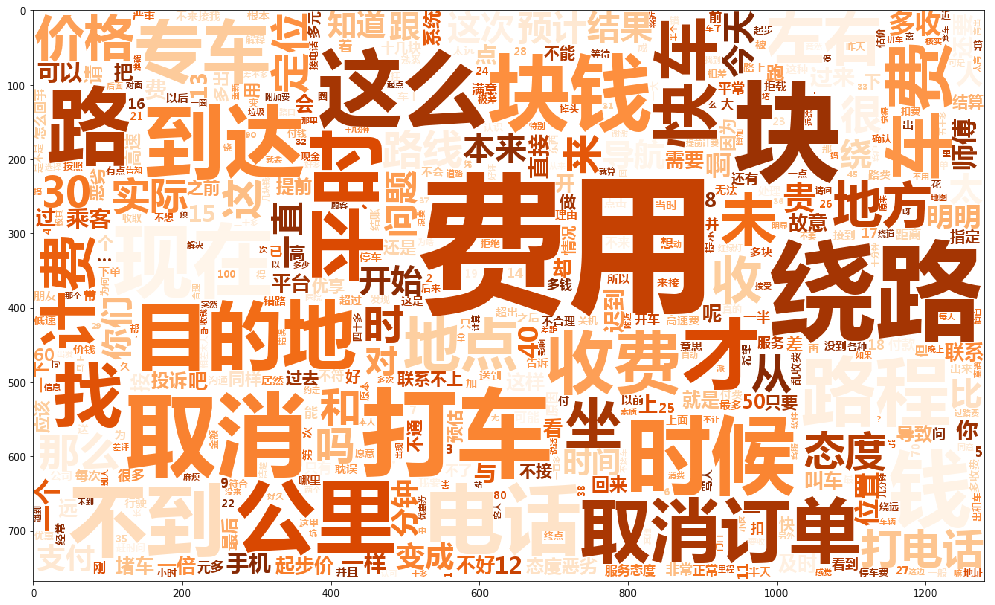

In [50]:
# plot with wordcloud
def ciyun(x): # x为分词结果，是一个{'词':词频数量}形式的词频字典对象。
    wcs = wc.WordCloud(font_path = 'Desktop/Python/msyhbd.ttf', #加载字体集
                      background_color = 'white', #设置词云背景颜色
                      max_words=500, # 词云允许显示的最大词数
                      max_font_size=200, # 字体最大值
                      colormap = 'Oranges', 
                      width=1280, # 设置图片默认的大小的宽度
                      height=768, # 设置图片默认的大小的长度
                      scale = 1,
                      relative_scaling = 0.5,
                      mask=None, #mask这里可以选择一个背景图片，例如用滴滴的logo来绘制词云的形状。这里暂未设置，有兴趣的同学可自行尝试。
                      collocations=False #默认值为collocations=True,此时如果有“苹果 使用 条款"三个词，词云会把三个词及他们的组合频率一并进行呈现，这样会带来词语的重复 
                      )
    wcs.generate_from_frequencies(x) #根据X（刚制作的词频字典对象）生成词云
    wcs.to_file('Desktop/Python/complaints.png') #将生成的词云图片保存在特定文件中

    #以下是在Jupyter中直接展示词云的命令
    fig = plt.gcf() 
    fig.set_size_inches(18.5, 10.5) #设置图片展示大小
    plt.imshow(wcs) #展示词云图片

#基于上一步生成的词频dict制作词云    
ciyun(word_dict)